## We are going to use Linear Discriminant Analysis (LDA) to examine bank failures in any metropolitan statistical area (MSA) in the US. If there is a bank failure episode in any year then that observation is coded as 1 and zero otherwise.
## There are 10 features that could have mutlicollinearity which would lead to overfitting. So, dimensionality reduction is relevant here. 

In [19]:
import seaborn as sns  
import matplotlib as plt 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model
import sklearn.metrics as sklm
import sklearn.decomposition as skde
from sklearn.preprocessing import scale 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split 
import sklearn.model_selection as ms
import pandas as pd  
import numpy as np 
import numpy.random as nr

%matplotlib inline

## The dataset spans more than 400 MSAs in the US from 1994-2014. There are 11 independent variables or features. 9 of them are banks' balacnce-sheet based variables like banks' capitalization, loans-to-assets, overhead costs, profitability, liquidity, credit risk, diversification and loan performance. The remaining two features are MSA-level economic conditions like personal income and unemployment rate. 

In [2]:
#Importing the bank failure dataset 
data = pd.read_csv('BankFailures.csv')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns)) 

(9096, 11)
['failure', 'tier1capital_wt', 'loan_asset_wt', 'oca_wt', 'roa_wt', 'liquidity_wt', 'creditrisk_wt', 'diversification_wt', 'chargeoff_rate_wt', 'income_msa', 'ur']


## Pairwise correlations among all variables.

In [3]:
data.corr(method='pearson', min_periods=1)

,failure,tier1capital_wt,loan_asset_wt,oca_wt,roa_wt,liquidity_wt,creditrisk_wt,diversification_wt,chargeoff_rate_wt,income_msa,ur
failure,1.000000,-0.014277,-0.041015,-0.016961,-0.182427,-0.035320,0.384379,0.100639,0.395274,0.212615,0.224509
tier1capital_wt,-0.014277,1.000000,-0.073789,-0.043558,0.054637,0.243700,-0.068351,-0.126545,-0.019802,-0.029512,0.020182
loan_asset_wt,-0.041015,-0.073789,1.000000,0.891538,0.791704,0.628456,0.007890,-0.009312,-0.002508,-0.048223,-0.055500
oca_wt,-0.016961,-0.043558,0.891538,1.000000,0.766291,0.619759,0.125408,0.248102,0.138619,-0.020949,-0.021556
roa_wt,-0.182427,0.054637,0.791704,0.766291,1.000000,0.604098,-0.300529,0.102660,-0.244524,-0.024215,-0.207244
liquidity_wt,-0.035320,0.243700,0.628456,0.619759,0.604098,1.000000,-0.146435,-0.098938,-0.110061,0.022970,0.011591
creditrisk_wt,0.384379,-0.068351,0.007890,0.125408,-0.300529,-0.146435,1.000000,0.231792,0.931284,0.053874,0.292793
diversification_wt,0.100639,-0.126545,-0.009312,0.248102,0.102660,-0.098938,0.231792,1.000000,0.252134,0.245459,0.001453
chargeoff_rate_wt,0.395274,-0.019802,-0.002508,0.138619,-0.244524,-0.110061,0.931284,0.252134,1.000000,0.071777,0.370003
income_msa,0.212615,-0.029512,-0.048223,-0.020949,-0.024215,0.022970,0.053874,0.245459,0.071777,1.000000,-0.006557


## As we can see above there is high degrees of correlation between several pairs of variables, validating concerns of multicollinearity and hence overfitting.

In [4]:
Features = np.array(data[['tier1capital_wt', 'loan_asset_wt', 'oca_wt', 'roa_wt', 'liquidity_wt', 'creditrisk_wt', 'diversification_wt', 'chargeoff_rate_wt', 'income_msa', 'ur']])
Labels =  np.array(data[['failure']])    

## Now we will partition the dataset into training and test datasets. 

In [5]:
# Split the dataset into test and training set
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 1820)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## We apply the zscore standardization method here. 

In [6]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

## We compute a linear discriminant analysis with 3 components on the features of the training dataset. 

In [39]:
LDA = LinearDiscriminantAnalysis(n_components=3)
LDA.fit(X_train, y_train)
Comps = LDA.transform(X_train)
Comps.shape 

(7276, 1)

## Define and fit the logistic regression model. 

In [16]:
log_mod_3 = linear_model.LogisticRegression(C = 10.0, class_weight = {0:0.45, 1:0.55}) 
log_mod_3.fit(Comps, y_train)
print(log_mod_3.intercept_)
print(log_mod_3.coef_)

[-3.0363729]
[[1.02491949]]


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Evaluating the performance metrics of the model.

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1621                52
Actual negative        85                62

Accuracy        0.92
AUC             0.90
Macro precision 0.75
Macro recall    0.70
 
           Positive      Negative
Num case     1673           147
Precision    0.95          0.54
Recall       0.97          0.42
F1           0.96          0.48


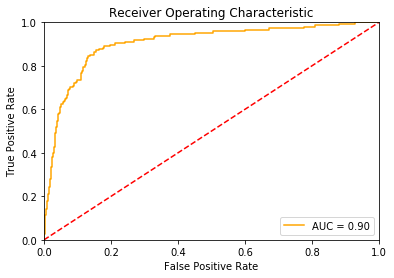

In [17]:
#Evaluate the model
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

probabilities = log_mod_3.predict_proba(LDA.transform(X_test))
print_metrics(y_test, probabilities, 0.3)    
plot_auc(y_test, probabilities)    

## Next we do a LDA model with 5 components.

In [32]:
LDA5 = LinearDiscriminantAnalysis(n_components=5)
LDA5.fit(X_train, y_train)
Comps = LDA5.transform(X_train)
Comps.shape

(7276, 1)

In [33]:
log_mod_5 = linear_model.LogisticRegression(C = 10.0, class_weight = {0:0.45, 1:0.55}) 
log_mod_5.fit(Comps, y_train)
print(log_mod_5.intercept_)
print(log_mod_5.coef_)

[-3.0363729]
[[1.02491949]]


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


                 Confusion matrix
                 Score positive    Score negative
Actual positive      1621                52
Actual negative        85                62

Accuracy        0.92
AUC             0.90
Macro precision 0.75
Macro recall    0.70
 
           Positive      Negative
Num case     1673           147
Precision    0.95          0.54
Recall       0.97          0.42
F1           0.96          0.48


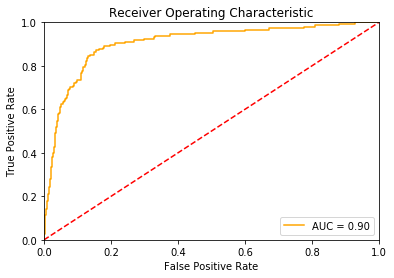

In [34]:
probabilities = log_mod_5.predict_proba(LDA5.transform(X_test))
print_metrics(y_test, probabilities, 0.3)  
plot_auc(y_test, probabilities)

## Overall, the performance metrics of the two models are the same. 